# Fraud Detection

##### The objective of this notebook is to find the patterns of transactions performed and help algorithms learn those patterns in identifying the fradulent transactions

### Goals :
#####  1 .Exploratory analysis of data to extract the pattern of fraudlent activites
#####   2. Build a machine learning model to classify fraud and non-fraud transactions



In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Import dataset
data= pd.read_csv('downloads/Fraud (1).csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.shape

(6362620, 11)

In [4]:
## Basic information  of dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
## description of dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

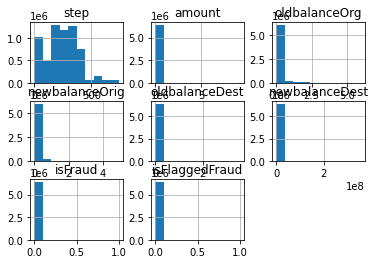

In [7]:
data.hist()

In [8]:
pd.unique(data['isFraud'])

array([0, 1], dtype=int64)

In [9]:
pd.unique(data['isFlaggedFraud'])

array([0, 1], dtype=int64)

### Data cleaning

#### Traeting missing values or NaN values

##### First we will try to find out if there is any null or NaN values in the dataset.

In [10]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### There are no null values in the dataset.

#### Treating outliers

##### For this task, we are going to use the Z -Score method

In [11]:
## We will use Z-score function defined in scipy library to detect the outliers.
from scipy import stats

##### We will take all the quantitative features for Z-Score function, except for "step" which is unrelated to the happening of fraud case, "isFraud" which is target variable and "isFlaggedFraud" which we will not be using in the model as it is not helpful to us.

In [12]:
z = np.abs(stats.zscore(data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]))
print(z)

[[2.81559923e-01 2.29810037e-01 2.37621696e-01 3.23813895e-01
  3.33411405e-01]
 [2.94767262e-01 2.81359380e-01 2.85812295e-01 3.23813895e-01
  3.33411405e-01]
 [2.97554804e-01 2.88653782e-01 2.92441707e-01 3.23813895e-01
  3.33411405e-01]
 ...
 [1.01539526e+01 1.89649113e+00 2.92441707e-01 3.03665258e-01
  1.40302700e+00]
 [1.10976490e+00 5.58104668e-03 2.92441707e-01 3.23813895e-01
  3.33411405e-01]
 [1.10976490e+00 5.58104668e-03 2.92441707e-01 1.59138312e+00
  1.66981230e+00]]


##### From the above output it is difficult to say which data point is an outlier.So we can use threshold to identify an outlier.

In [13]:
threshold = 3
print(np.where(z>3))

(array([     84,      88,      89, ..., 6362599, 6362616, 6362617],
      dtype=int64), array([4, 4, 4, ..., 0, 0, 0], dtype=int64))


###### The first array contains the list of row numbers and second array contains coloumn numbers,which means z[84][4] have a z-zscore higher than 3.

In [14]:
print(z[84][4])

4.883935818423778


##### we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z

In [15]:
data_new = data[(z < 3).all(axis=1)]


###### Now, the outliers have been removed, lets compare both datasets of before and after the removal of outliers respectively

In [16]:
data.shape

(6362620, 11)

In [17]:
data_new.shape

(6090589, 11)

###### So, above code removed 272031 rows from the dataset i.e. outliers have been removed.

### Converting categorical data into numeric data

In [18]:
dummy_type=pd.get_dummies(data_new['type'])
dummy_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090589 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column    Dtype
---  ------    -----
 0   CASH_IN   uint8
 1   CASH_OUT  uint8
 2   DEBIT     uint8
 3   PAYMENT   uint8
 4   TRANSFER  uint8
dtypes: uint8(5)
memory usage: 75.5 MB


In [19]:
data_new=pd.concat([data_new,dummy_type],axis=1)

### Data Distributon and Balancing dataset

In [20]:
data_new['isFraud'].value_counts()

0    6084104
1       6485
Name: isFraud, dtype: int64

#### the data is highly imbalanced, so we will first have to balane the data

In [21]:
fraud= data_new[data_new.isFraud == 1]
legit= data_new[data_new.isFraud == 0]

In [22]:
data_new.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,,,
0,242.839546,144631.029706,454638.850957,474521.117296,818627.120285,907732.311040,0.000000,0.200797,0.361156,0.006695,0.35362,0.077731
1,366.257209,465158.785314,463726.430891,458.779644,399102.775224,634305.955593,0.000463,0.000000,0.499306,0.000000,0.00000,0.500694


In [23]:
from random import sample
legit_sample = legit.sample(n=6485)

In [24]:
balanced_data= pd.concat([legit_sample, fraud], axis= 0)

In [25]:
balanced_data['isFraud'].value_counts()

1    6485
0    6485
Name: isFraud, dtype: int64

### Correlation amoung the features for feature selection

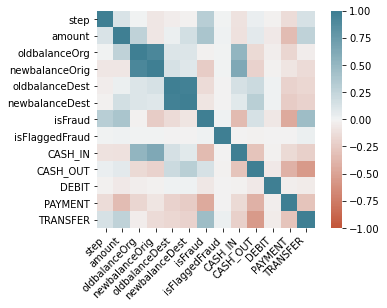

In [26]:
corrMatrix=balanced_data.corr()

ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### As we can see, "oldbalanceOrg" and "newbalanceOrig" are higly correlated, similarly "oldbalanceDest" and "newbalanceDest" are also highly correlated, so we will only take one from each pair as a predictor.

### Model building
#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#### Spliting the dataset into train set and test set
###### Now, we are going to split the data set into train and test data with a divion of 70% of 30% for train and test respectively

In [28]:
from sklearn.model_selection import train_test_split

X = balanced_data[['step','amount','oldbalanceOrg','oldbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
Y = balanced_data["isFraud"]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

In [29]:
## Now lets fit the model with traing data set
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
## finding the score of the model
model.score(x_train,y_train)

0.6429122150016522

In [32]:
model.score(x_test,y_test)

0.6515034695451041

#### here we having low accuracy rate with the balanced data. For once, lets also have a look at the unbalanced data with the same method

In [33]:
x = data_new[['step','amount','oldbalanceOrg','oldbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
y = data_new["isFraud"]

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [34]:
model.fit(X_train,Y_train)

LogisticRegression()

In [36]:
model.score(X_train,Y_train)

0.9989379398472398

In [37]:
model.score(X_test,Y_test)

0.9989289488648335

In [38]:
y_pred=model.predict(x_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [40]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1878    0]
 [2013    0]]
0.4826522744795682


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1878
           1       0.00      0.00      0.00      2013

    accuracy                           0.48      3891
   macro avg       0.24      0.50      0.33      3891
weighted avg       0.23      0.48      0.31      3891



C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### As we can clearly see, the unbalanced data have a better accuracy rate. We can use any of them depending upon the needs